In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
import os
from tqdm import tqdm
from sklearn.decomposition import PCA
import glob

# Mel or Chroma 

Loading hiphop: 100%|██████████| 100/100 [00:00<00:00, 122.67it/s]


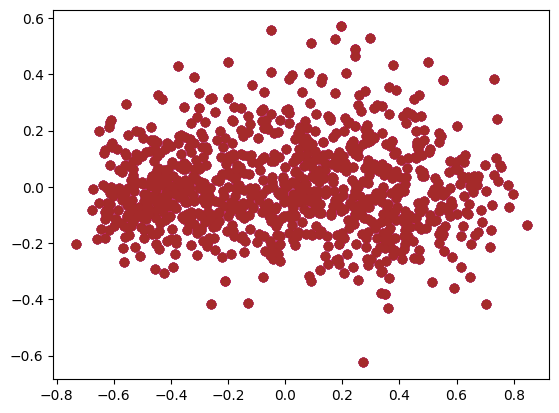

In [ ]:
directory_path = '/home/sangheon/Desktop/GTZAN_Data/Data/Chromagram'

X, y_true, file_names = [], [], []
fixed_length = 12 * 1293

for genre in os.listdir(directory_path):
    genre_dir = os.path.join(directory_path, genre)
    for csv_file in tqdm(glob.glob(f'{genre_dir}/*.csv'), desc = f"Loading {genre}"):
        mel = pd.read_csv(csv_file).values
        mel_flat = mel.flatten()
        if len(mel_flat) >= fixed_length:
            mel_flat = mel_flat[:fixed_length]
        else:
            mel_flat = np.pad(mel_flat, (0, fixed_length - len(mel_flat)))

        X.append(mel_flat)
        y_true.append(genre)
        file_names.append(os.path.basename(csv_file))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['P1', 'P2']

X_principal.head()

# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 10, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Building the label to colour mapping
colours = {
    0: 'b',
    1: 'y',
    2: 'r',
    3: 'purple',
    4: 'g',
    5: 'orange',
    6: 'cyan',
    7: 'magenta',
    8: 'pink',
    9: 'brown'
}

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
p = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'purple')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g')
o = plt.scatter(X_principal['P1'], X_principal['P2'], color ='orange')
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='cyan')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
m = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'magenta')
br = plt.scatter(X_principal['P1'], X_principal['P2'], color ='brown')

plt.figure(figsize=(10, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.legend((b, y, r, p, g, o, c, r, m, br), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9'))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.title("Chromagram Spectral Clustering Visualization")
plt.savefig('chroma_spctral.png')
plt.close()

# Concat

Loading hiphop: 100%|██████████| 100/100 [00:02<00:00, 43.49it/s]


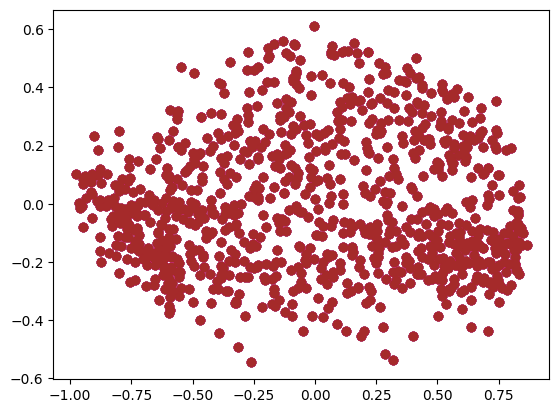

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from config import *

mel_root = '/home/sangheon/Desktop/GTZAN_Data/Data/MelSpec'
chroma_root = '/home/sangheon/Desktop/GTZAN_Data/Data/Chromagram'

def load_combined_dataset(mel_root, chroma_root):

    genres = os.listdir(mel_root)
    X, y_true, file_names = [], [], []
    fixed_length = 129 * 1293 + 12 * 1293

    for genre in genres:
        mel_genre_dir = os.path.join(mel_root, genre)
        chroma_genre_dir = os.path.join(chroma_root, genre)

        for csv_file in tqdm(glob.glob(f'{mel_genre_dir}/*.csv'), desc = f"Loading {genre}"):
            fname = os.path.basename(csv_file)
            mel_path = os.path.join(mel_genre_dir, fname)
            chroma_path = os.path.join(chroma_genre_dir, fname)

            mel = pd.read_csv(mel_path).values
            chroma = pd.read_csv(chroma_path).values

            T = min(mel.shape[1], chroma.shape[1])
            mel = mel[:, :T]
            chroma = chroma[:, :T]
            feat = np.concatenate([mel, chroma], axis = 0)
            feat_flat = feat.flatten()
            if len(feat_flat) >= fixed_length:
                feat_flat = feat_flat[:fixed_length]
            else:
                feat_flat = np.pad(feat_flat, (0, fixed_length - len(feat_flat)))

            X.append(feat_flat)
            y_true.append(genre)
            file_names.append(fname)

    return np.array(X), y_true, file_names

X, y, file_names = load_combined_dataset(mel_root = mel_root, chroma_root = chroma_root)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['P1', 'P2']

X_principal.head()

# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 10, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Building the label to colour mapping
colours = {
    0: 'b',
    1: 'y',
    2: 'r',
    3: 'purple',
    4: 'g',
    5: 'orange',
    6: 'cyan',
    7: 'magenta',
    8: 'pink',
    9: 'brown'
}

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
p = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'purple')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g')
o = plt.scatter(X_principal['P1'], X_principal['P2'], color ='orange')
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='cyan')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
m = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'magenta')
br = plt.scatter(X_principal['P1'], X_principal['P2'], color ='brown')

plt.figure(figsize=(10, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.legend((b, y, r, p, g, o, c, r, m, br), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9'))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.title("Concatenated Spectral Clustering Visualization")
plt.savefig('concat_spctral.png')
plt.close()

In [ ]:
import librosa
from sklearn.metrics.pairwise import cosine_similarity

X, y, file_names = load_combined_dataset(mel_root=mel_root, chroma_root=chroma_root)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)

pca = PCA(n_components=200)
pca.fit(X_normalized)
X_principal = pca.transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

feature_type = 'concatenated'
input_audio_path = '/home/sangheon/Desktop/ML_Music_Similarity/test_data/closer.wav'
y, sr = librosa.load(input_audio_path, sr=16000)

if feature_type == 'mel':
    feature = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=129)
    feature_db = librosa.power_to_db(feature)
elif feature_type == 'chroma':
    feature_db = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)
elif feature_type == 'concatenated':
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=129)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)
    T = min(mel.shape[1], chroma.shape[1])
    mel_db = librosa.power_to_db(mel[:, :T])
    chroma = chroma[:, :T]
    feature_db = np.concatenate((mel_db, chroma), axis=0)

print(feature_db.shape)

feature_scaled = scaler.transform(feature_db)
feature_normalized = normalize(feature_scaled)
feature_example = pca.transform(feature_normalized)

feature_mean = np.mean(feature_example, axis=0).reshape(1, -1)

similarities = cosine_similarity(feature_mean, X_principal)

top5_indices = np.argsort(similarities.flatten())[::-1][:5]

print("Top 5 Recommended Songs:")
for idx in top5_indices:
    print(f"File: {file_names[idx]} | Similarity: {similarities[0, idx]:.4f}")

Loading hiphop: 100%|██████████| 100/100 [00:02<00:00, 42.96it/s]


(141, 7492)


ValueError: X has 7492 features, but StandardScaler is expecting 182313 features as input.

# PCA dimension 

Loading hiphop: 100%|██████████| 100/100 [00:02<00:00, 36.50it/s]


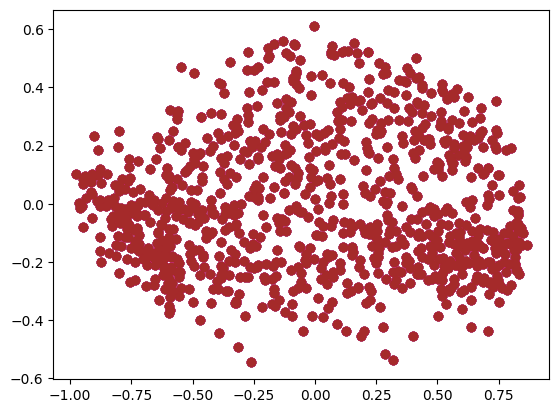

In [4]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from config import *

mel_root = '/home/sangheon/Desktop/GTZAN_Data/Data/MelSpec'
chroma_root = '/home/sangheon/Desktop/GTZAN_Data/Data/Chromagram'

def load_combined_dataset(mel_root, chroma_root):

    genres = os.listdir(mel_root)
    X, y_true, file_names = [], [], []
    fixed_length = 129 * 1293 + 12 * 1293

    for genre in genres:
        mel_genre_dir = os.path.join(mel_root, genre)
        chroma_genre_dir = os.path.join(chroma_root, genre)

        for csv_file in tqdm(glob.glob(f'{mel_genre_dir}/*.csv'), desc = f"Loading {genre}"):
            fname = os.path.basename(csv_file)
            mel_path = os.path.join(mel_genre_dir, fname)
            chroma_path = os.path.join(chroma_genre_dir, fname)

            mel = pd.read_csv(mel_path).values
            chroma = pd.read_csv(chroma_path).values

            T = min(mel.shape[1], chroma.shape[1])
            mel = mel[:, :T]
            chroma = chroma[:, :T]
            feat = np.concatenate([mel, chroma], axis = 0)
            feat_flat = feat.flatten()
            if len(feat_flat) >= fixed_length:
                feat_flat = feat_flat[:fixed_length]
            else:
                feat_flat = np.pad(feat_flat, (0, fixed_length - len(feat_flat)))

            X.append(feat_flat)
            y_true.append(genre)
            file_names.append(fname)

    return np.array(X), y_true, file_names

X, y, file_names = load_combined_dataset(mel_root = mel_root, chroma_root = chroma_root)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['P1', 'P2']

X_principal.head()

# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 10, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Building the label to colour mapping
colours = {
    0: 'b',
    1: 'y',
    2: 'r',
    3: 'purple',
    4: 'g',
    5: 'orange',
    6: 'cyan',
    7: 'magenta',
    8: 'pink',
    9: 'brown'
}

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
p = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'purple')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g')
o = plt.scatter(X_principal['P1'], X_principal['P2'], color ='orange')
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='cyan')
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
m = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'magenta')
br = plt.scatter(X_principal['P1'], X_principal['P2'], color ='brown')

plt.figure(figsize=(10, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.legend((b, y, r, p, g, o, c, r, m, br), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9'))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.title("Concatenated Spectral Clustering Visualization")
plt.savefig('concat_spctral.png')
plt.close()

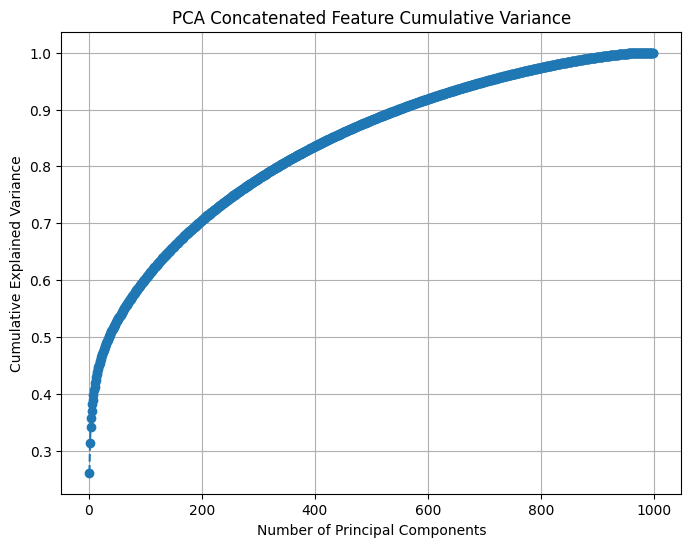

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_normalized)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Concatenated Feature Cumulative Variance')
plt.grid(True)
plt.show()